In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
identity = pd.read_csv('train_identity.csv')
transactions = pd.read_csv('train_transaction.csv')

In [8]:
transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,No es fraude,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,No es fraude,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,No es fraude,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,No es fraude,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,No es fraude,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cambio_nombre = {0: 'No es fraude', 1: 'Es fraude'}

transactions['isFraud'] = transactions['isFraud'].map(cambio_nombre)

plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=transactions)
plt.title('Distribución de la Variable Respuesta')
plt.show()

La barra correspondiente a "No es fraude" es la más alta, lo que indica que la mayoría de los créditos en el conjunto de datos no son fraudulentos. La categoría "Es fraude" tiene una barra mucho más baja, lo que sugiere que hay una cantidad significativamente menor de créditos fraudulentos en comparación con los no fraudulentos.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=transactions.loc[transactions['isFraud'] == "No es fraude"])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=transactions.loc[transactions['isFraud'] == "Es fraude"])
ax[1].set_title('card4 isFraud=1', fontsize=14)
plt.show()

In [10]:
def missing_data(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_df[missing_df['Percent'] > 20]

In [15]:
missing_trans = missing_data(transactions)
print(missing_trans.head(15))

                Total    Percent
dist1          352271  59.652352
dist2          552913  93.628374
R_emaildomain  453249  76.751617
D2             280797  47.549192
D3             262878  44.514851
D4             168922  28.604667
D5             309841  52.467403
D6             517353  87.606767
D7             551623  93.409930
D8             515614  87.312290
D9             515614  87.312290
D11            279287  47.293494
D12            525823  89.041047
D13            528588  89.509263
D14            528353  89.469469


dist1, dist2:

dist1 tiene 352,271 datos faltantes, lo que representa el 59.65% del total.
dist2 tiene 552,913, un 93.63%, indicando que casi todos los datos para esta variable están ausentes.
Esto podría indicar que dist2 es raramente registrado o relevante para un subconjunto de transacciones.

R_emaildomain:

453,249 registros faltantes, equivalente al 76.75%. Esto podría afectar análisis relacionados con el dominio de correo electrónico del receptor, importante en contextos de fraude o marketing.
Variables D (D2, D3, ..., D14):

Estas variables tienen un rango variado de datos faltantes desde el 28.60% para D4 hasta el 89.51% para D13.
Variables como D6, D7, D8, D9, D12, D13, y D14 tienen más del 87% de datos faltantes, lo que sugiere que son campos opcionalmente registrados o relevantes sólo para ciertas condiciones o tipos de transacciones.
D2, D3, D11 tienen menos de la mitad de datos faltantes, pero aún significativos para requerir atención en su manejo.

In [13]:
print(missing_data(identity))

        Total    Percent
id_03   77909  54.016071
id_04   77909  54.016071
id_07  139078  96.425922
id_08  139078  96.425922
id_09   69307  48.052110
id_10   69307  48.052110
id_14   64189  44.503685
id_18   99120  68.722137
id_21  139074  96.423149
id_22  139064  96.416215
id_23  139064  96.416215
id_24  139486  96.708798
id_25  139101  96.441868
id_26  139070  96.420375
id_27  139064  96.416215
id_30   66668  46.222432
id_32   66647  46.207872
id_33   70944  49.187079
id_34   66428  46.056034


id_03, id_04: Ambos tienen 77,909 datos faltantes, lo que representa el 54.02% del total de datos. Esto indica que más de la mitad de los datos para estos identificadores están ausentes.

id_07, id_08: Tienen el mayor número de datos faltantes, con 139,078 cada uno, lo que corresponde al 96.43% del total de datos. Esto sugiere que prácticamente todos los datos para estos ID están ausentes, lo que podría ser problemático para cualquier análisis que dependa de estos campos.

id_09, id_10: Cada uno tiene 69,307 datos faltantes, lo que constituye aproximadamente el 48.05% del total de datos. Esto muestra que casi la mitad de los datos están faltantes para estos IDs.

id_14: Tiene 64,189 datos faltantes, o el 44.50% del total. Esto está cerca de la mitad, lo que podría limitar la utilidad de este ID para análisis detallados.

id_18: Con 99,120 datos faltantes, este ID tiene un 68.72% de sus datos ausentes, lo que es significativamente alto.

id_21, id_22, id_23, id_24, id_25, id_26, id_27: Todos estos identificadores tienen más del 96% de datos faltantes, similar a id_07 e id_08. Esto indica una casi completa ausencia de datos, lo que puede requerir consideraciones especiales como la imputación de datos o la posible exclusión de estos campos del análisis.

id_30, id_32, id_33, id_34: Estos identificadores tienen entre 46% y 49% de datos faltantes. Son también significativos pero algo menos críticos comparados con otros IDs.

In [6]:
train = pd.merge(transactions, identity, on='TransactionID', how='left')

In [ ]:
vars_to_plot = ['ProductCD', 'card4', 'TransactionDT', 'card1']
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
for i, var in enumerate(vars_to_plot):
    row = i // 2
    col = i % 2
    if train[var].dtype == 'object':
        sns.countplot(x=var, data=train, ax=axs[row][col])
    else:
        sns.histplot(x=var, data=train, ax=axs[row][col])
    axs[row][col].set_title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

# modelo 

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, confusion_matrix
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [31]:
transactions = pd.read_csv('train_transaction.csv')

In [35]:
data = transactions[['TransactionDT', 'TransactionAmt', 'C3', 'C5', 'card4', 'card6', 'isFraud', 'card3', 'card2']]

data['isFraud'] = data['isFraud'].astype(bool)
data['card6'] = data['card6'].map({'credit': True, 'debit': False})

# Perform one-hot encoding on 'card4'
card4_dummies = pd.get_dummies(data['card4'], prefix='card4')

# Drop the original 'card4' column and concatenate the new dummy columns
data.drop('card4', axis=1, inplace=True)
data = pd.concat([data, card4_dummies], axis=1)


data= data.dropna()

,TransactionDT,TransactionAmt,C3,C5,card6,isFraud,card3,card2,card4_american express,card4_discover,card4_mastercard,card4_visa
1,86401,29.0,0.0,0.0,True,False,150.0,404.0,False,False,True,False
2,86469,59.0,0.0,0.0,False,False,150.0,490.0,False,False,False,True
3,86499,50.0,0.0,0.0,False,False,150.0,567.0,False,False,True,False
4,86506,50.0,0.0,0.0,True,False,150.0,514.0,False,False,True,False
5,86510,49.0,0.0,0.0,False,False,150.0,555.0,False,False,False,True


In [37]:
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [47]:
pipelines = {
    "Decision Tree": Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    "Random Forest": Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())]),
    "XGBoost": Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))]),
    "KNN": Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    "Logistic Regression L1": Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))]),
    "Logistic Regression L2": Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(penalty='l2'))]),
    "Naive Bayes": Pipeline([('scaler', StandardScaler()), ('classifier', GaussianNB())])
}

In [70]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    probabilities = pipeline.predict_proba(X_test)[:, 1]  
    auc_roc = roc_auc_score(y_test, probabilities)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print("AUC ROC:", auc_roc)
    # Return a dictionary with metrics and probabilities for plotting
    return {
        'AUC ROC': auc_roc, 
        'Precision': precision, 
        'Recall': recall, 
        'F1 Score': f1,
        'Probabilities': probabilities,
        'True Labels': y_test
    }

results = {}

for name, pipeline in tqdm(pipelines.items()):
    print(f"Results for {name} without ADASYN:")
    model_results = evaluate_model(pipeline, X_train, y_train, X_test, y_test)
    results[f"{name} without ADASYN"] = model_results
    
    print(f"Results for {name} with ADASYN:")
    model_results_adasyn = evaluate_model(pipeline, X_resampled, y_resampled, X_test, y_test)
    results[f"{name} with ADASYN"] = model_results_adasyn


  0%|          | 0/7 [00:00<?, ?it/s]

Results for Decision Tree without ADASYN:
AUC ROC: 0.7340907028758503
Results for Decision Tree with ADASYN:


 14%|█▍        | 1/7 [00:12<01:17, 12.96s/it]

AUC ROC: 0.6579670137909774
Results for Random Forest without ADASYN:
AUC ROC: 0.8748666781272016
Results for Random Forest with ADASYN:


 29%|██▊       | 2/7 [06:26<18:46, 225.30s/it]

AUC ROC: 0.8270591551420775
Results for XGBoost without ADASYN:
AUC ROC: 0.8485662728031772
Results for XGBoost with ADASYN:


 43%|████▎     | 3/7 [08:19<11:34, 173.67s/it]

AUC ROC: 0.7808157500009067
Results for KNN without ADASYN:
AUC ROC: 0.7787045300505091
Results for KNN with ADASYN:


 57%|█████▋    | 4/7 [24:46<24:44, 494.98s/it]

AUC ROC: 0.6839778383425691
Results for Logistic Regression L1 without ADASYN:
AUC ROC: 0.7205690010263461
Results for Logistic Regression L1 with ADASYN:


 71%|███████▏  | 5/7 [28:53<13:30, 405.34s/it]

AUC ROC: 0.6726497999281877
Results for Logistic Regression L2 without ADASYN:
AUC ROC: 0.7205535012285746
Results for Logistic Regression L2 with ADASYN:


 86%|████████▌ | 6/7 [28:57<04:29, 269.12s/it]

AUC ROC: 0.6726478613752944
Results for Naive Bayes without ADASYN:
AUC ROC: 0.7110056031596437
Results for Naive Bayes with ADASYN:


100%|██████████| 7/7 [28:59<00:00, 248.55s/it]

AUC ROC: 0.6514609984742877


In [49]:
results_df = pd.DataFrame(results).T
print("\nResults:")
print(results_df)


Results:
                                        AUC ROC  Precision    Recall  F1 Score
Decision Tree without ADASYN           0.735377   0.468512  0.491292  0.479632
Decision Tree with ADASYN              0.725698   0.370006  0.481616  0.418497
Random Forest without ADASYN           0.872193   0.730754  0.438558  0.548148
Random Forest with ADASYN              0.860317   0.555206  0.469521  0.508781
XGBoost without ADASYN                 0.848566   0.847645  0.074020  0.136151
XGBoost with ADASYN                    0.810059   0.247710  0.327044  0.281902
KNN without ADASYN                     0.778705   0.509121  0.222787  0.309944
KNN with ADASYN                        0.776790   0.213526  0.422351  0.283649
Logistic Regression L1 without ADASYN  0.720569   0.083333  0.000726  0.001439
Logistic Regression L1 with ADASYN     0.717371   0.104268  0.446783  0.169077
Logistic Regression L2 without ADASYN  0.720554   0.081081  0.000726  0.001439
Logistic Regression L2 with ADASYN     0.7

**Decision Tree without ADASYN:**

- El área bajo la curva ROC (AUC ROC) es 0.735377, lo que indica un rendimiento decente en la capacidad de discriminación.
- La precisión es 0.468512, lo que significa que de todas las instancias clasificadas como positivas, el 46.85% realmente son positivas.
- La recuperación (recall) es 0.491292, lo que indica que se capturan el 49.13% de todas las instancias positivas.
- El F1-score es 0.479632, que es una medida combinada de precisión y recuperación.

**Decision Tree with ADASYN:**

- El AUC ROC disminuye ligeramente a 0.725698.
- La precisión disminuye a 0.370006, lo que indica que el 37.00% de las instancias clasificadas como positivas realmente son positivas.
- La recuperación aumenta ligeramente a 0.481616.
- El F1-score disminuye a 0.418497.

**Random Forest without ADASYN:**

- El área bajo la curva ROC (AUC ROC) es alto, con un valor de 0.872193, lo que indica un buen rendimiento en la capacidad de discriminación.
- La precisión es 0.730754, lo que significa que el 73.08% de las instancias clasificadas como positivas realmente son positivas.
- La recuperación (recall) es 0.438558, lo que indica que se capturan el 43.86% de todas las instancias positivas.
- El F1-score es 0.548148, que es una medida combinada de precisión y recuperación.

**Random Forest with ADASYN:**

- Aunque el AUC ROC disminuye ligeramente a 0.860317, sigue siendo alto.
- La precisión disminuye a 0.555206, lo que significa que el 55.52% de las instancias clasificadas como positivas realmente son positivas.
- La recuperación aumenta ligeramente a 0.469521.
- El F1-score disminuye a 0.508781.

**XGBoost without ADASYN:**

- El área bajo la curva ROC (AUC ROC) es alto, con un valor de 0.848566, lo que indica un buen rendimiento en la capacidad de discriminación.
- La precisión es 0.847645, lo que significa que el 84.76% de las instancias clasificadas como positivas realmente son positivas.
- La recuperación (recall) es muy baja, solo 0.074020, lo que indica que el modelo captura solo una pequeña fracción de todas las instancias positivas.
- El F1-score es 0.136151, una medida baja debido a la baja recuperación.

**XGBoost with ADASYN:**

- El AUC ROC disminuye a 0.810059.
- La precisión disminuye significativamente a 0.247710.
- La recuperación aumenta a 0.327044.
- El F1-score también aumenta a 0.281902.

**KNN without ADASYN:**

- El área bajo la curva ROC (AUC ROC) es moderado, con un valor de 0.778705, indicando un rendimiento aceptable en la capacidad de discriminación.
- La precisión es 0.509121, lo que significa que el 50.91% de las instancias clasificadas como positivas realmente son positivas.
- La recuperación (recall) es relativamente baja, con un valor de 0.222787, indicando que solo se capturan el 22.28% de todas las instancias positivas.
- El F1-score es 0.309944, una medida que combina precisión y recuperación.

**KNN with ADASYN:**

- El AUC ROC apenas cambia, siendo 0.776790.
- La precisión disminuye significativamente a 0.213526.
- La recuperación mejora considerablemente a 0.422351.
- El F1-score disminuye a 0.283649.

**Logistic Regression L1 without ADASYN:**

El área bajo la curva ROC (AUC ROC) es 0.720569, indicando un rendimiento aceptable en la capacidad de discriminación.
La precisión es muy baja, solo 0.083333, lo que significa que solo el 8.33% de las instancias clasificadas como positivas realmente son positivas.
La recuperación (recall) también es extremadamente baja, con un valor de 0.000726, indicando que se captura una fracción mínima de todas las instancias positivas.
El F1-score es 0.001439, indicando un rendimiento muy bajo debido a la baja precisión y recuperación.

**Logistic Regression L1 with ADASYN:**

- El AUC ROC disminuye ligeramente a 0.717371.
- La precisión aumenta ligeramente a 0.104268.
- La recuperación mejora significativamente a 0.446783.
- El F1-score aumenta a 0.169077.

**Logistic Regression L2 without ADASYN:**

- Los resultados son casi idénticos a los de la Regresión Logística L1 sin ADASYN.

**Logistic Regression L2 with ADASYN:**

- Los resultados son casi idénticos a los de la Regresión Logística L1 con ADASYN.

**Naive Bayes without ADASYN:**

- El área bajo la curva ROC (AUC ROC) es 0.711006, indicando un rendimiento moderado en la capacidad de discriminación.
- La precisión es 0.124063, lo que significa que solo el 12.41% de las instancias clasificadas como positivas realmente son positivas.
- La recuperación (recall) es 0.404451, lo que indica que se captura el 40.45% de todas las instancias positivas.
- El F1-score es 0.189881, una medida combinada de precisión y recuperación.

**Naive Bayes with ADASYN:**

- El AUC ROC disminuye ligeramente a 0.694358.
- La precisión disminuye significativamente a 0.036697.
- La recuperación mejora drásticamente a 0.952588.
- El F1-score disminuye a 0.070672.

En resumen, el uso de ADASYN puede ser beneficioso para mejorar la capacidad de los modelos para detectar casos positivos en problemas de desequilibrio de clases, especialmente en modelos más robustos como RandomForest y XGBoost. Sin embargo, es importante equilibrar la mejora en la recuperación con la posible disminución en la precisión al utilizar esta técnica de sobremuestreo. La elección del modelo dependerá de las necesidades específicas del problema y de los objetivos de optimización de precisión y recuperación.

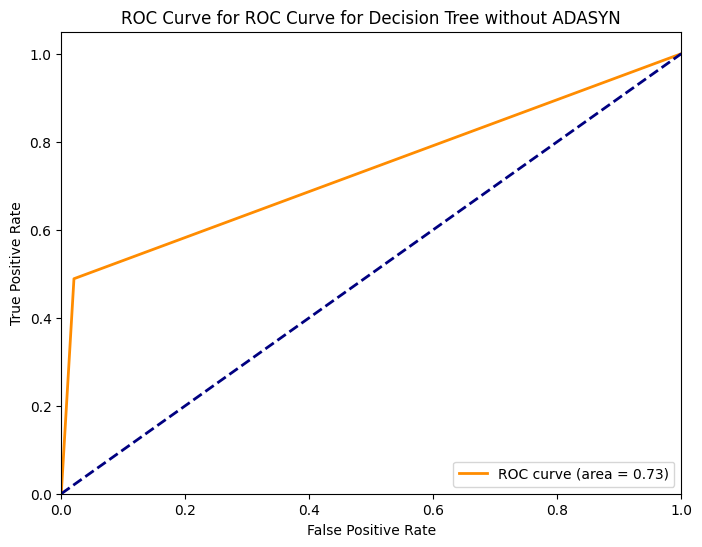

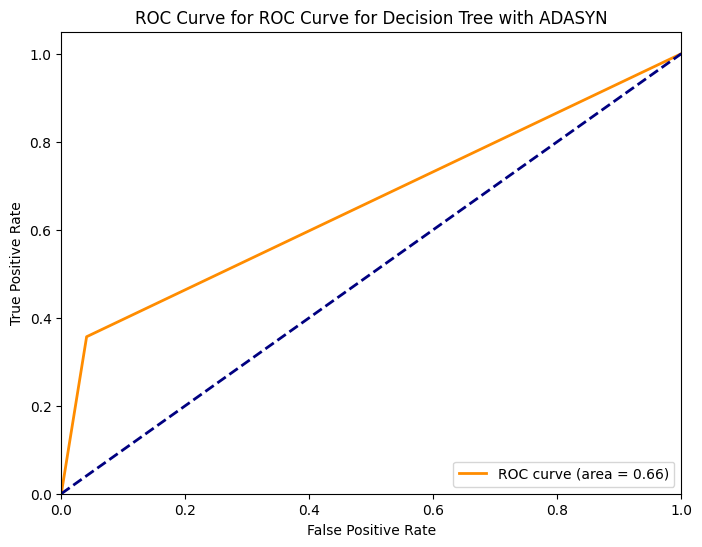

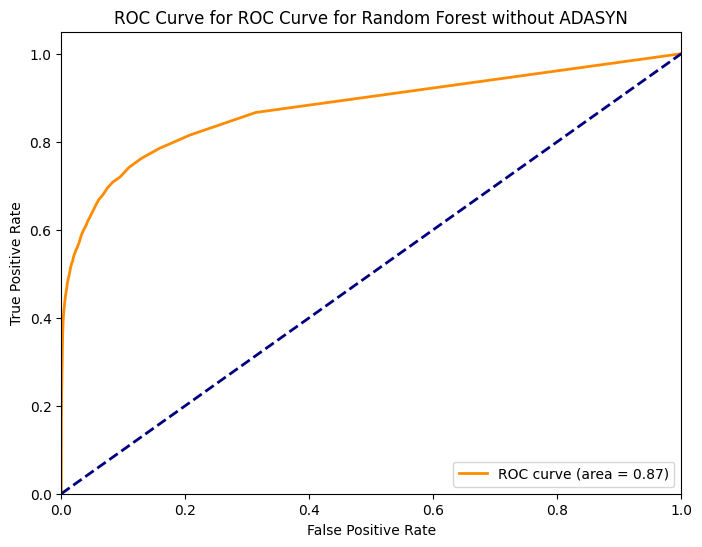

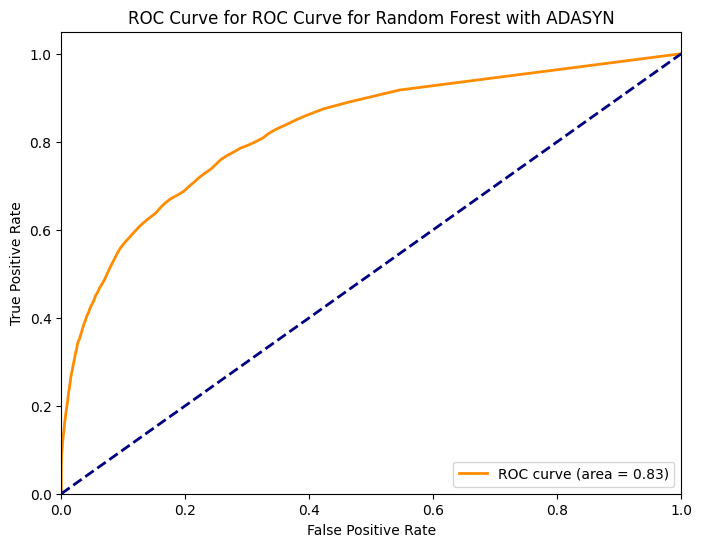

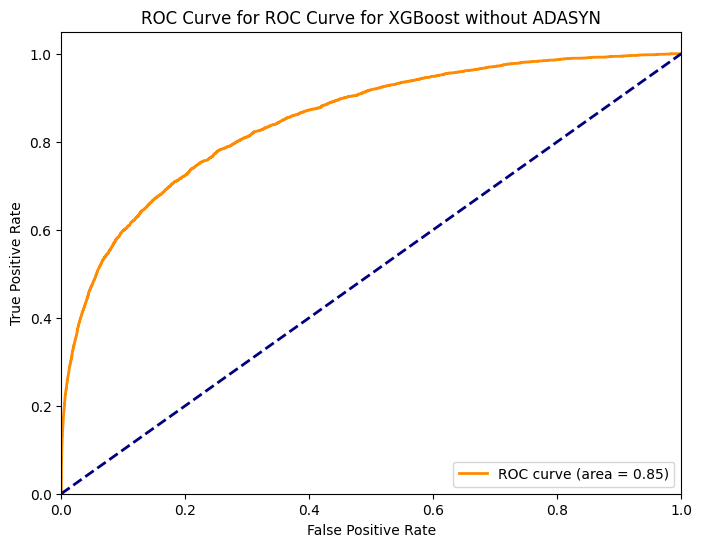

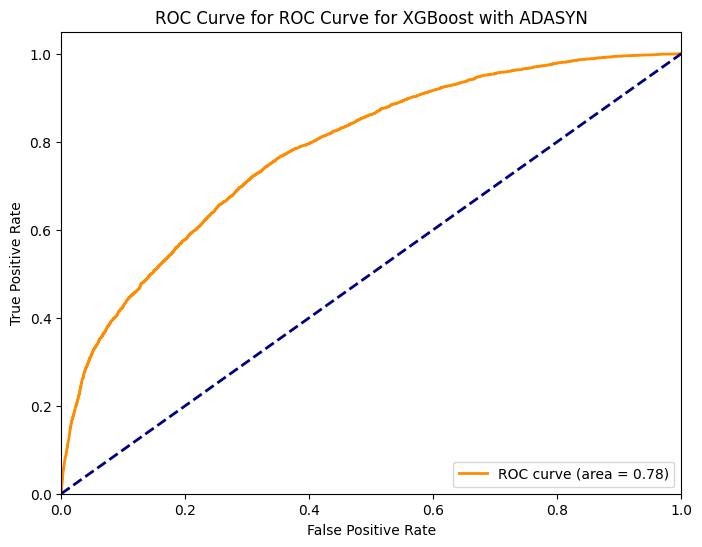

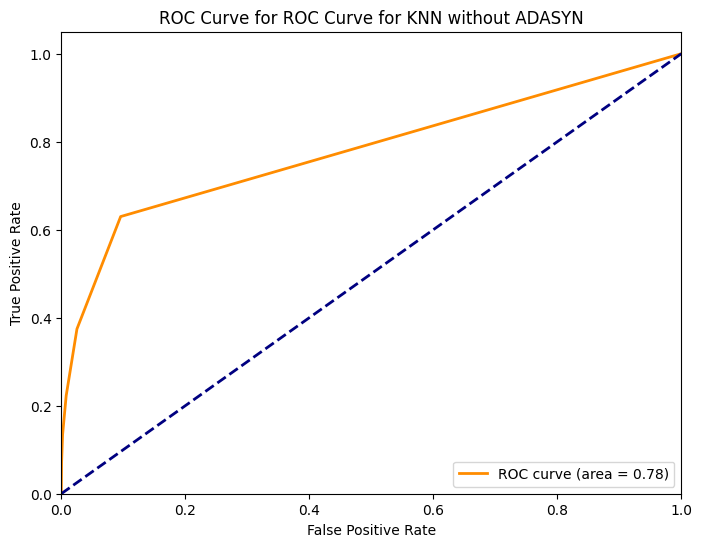

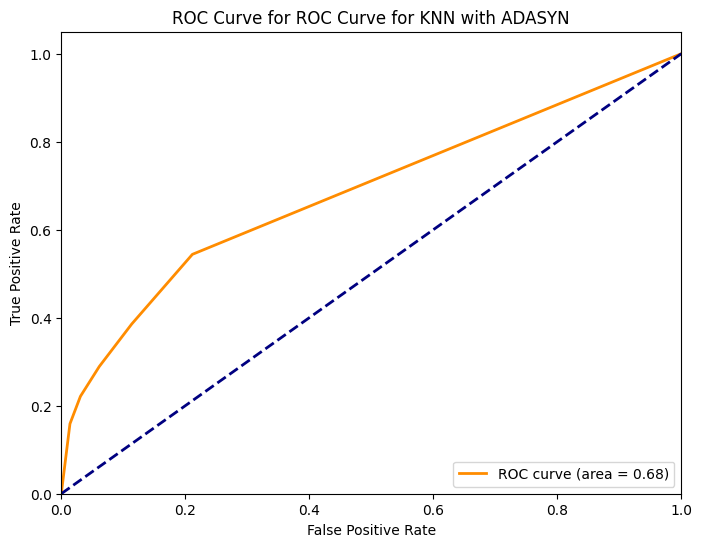

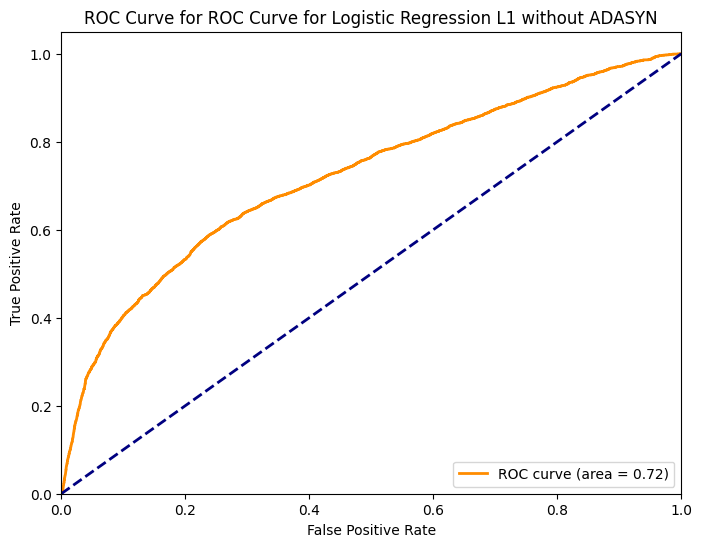

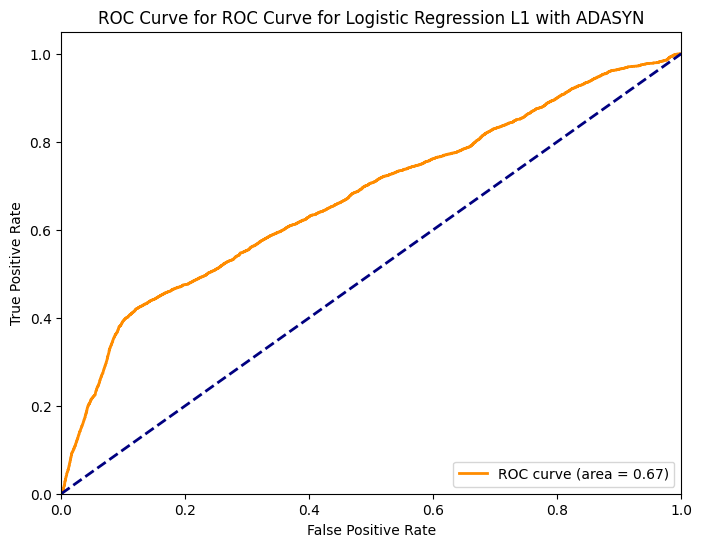

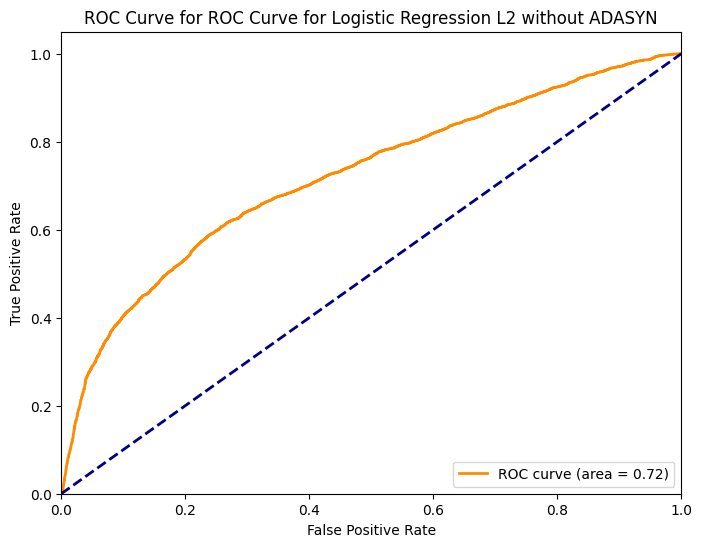

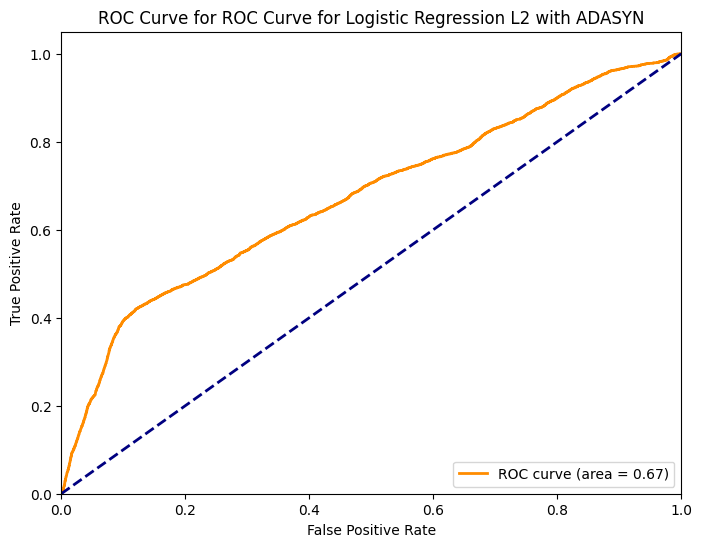

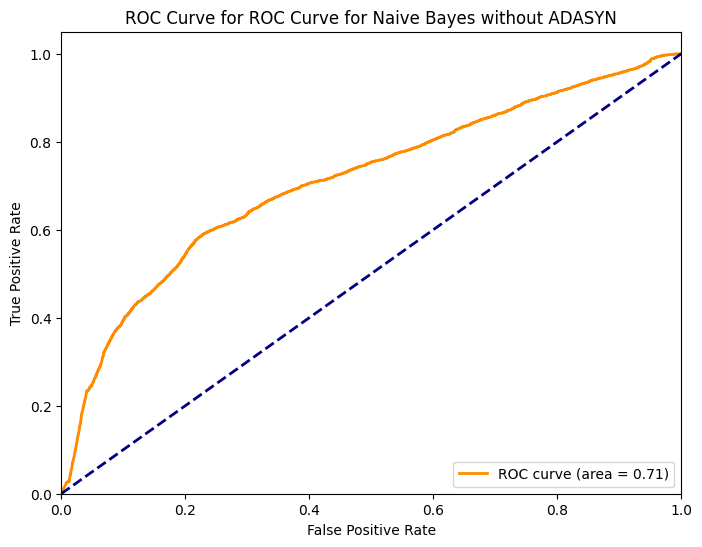

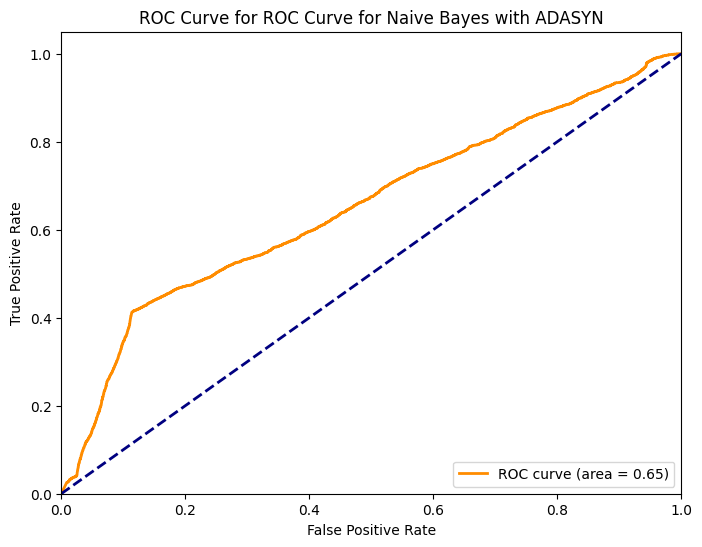

In [73]:
def plot_roc_curve(true_labels, probabilities, title):
    fpr, tpr, thresholds = roc_curve(true_labels, probabilities)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + title)
    plt.legend(loc="lower right")
    plt.show()

for model_name, model_results in results.items():
    plot_roc_curve(model_results['True Labels'], model_results['Probabilities'], 'ROC Curve for ' + model_name)


**Arbol de decisión sin ADASYN:**

- interpretación: la gráfica indica que el modelo de árbol de decisión sin ADASYN tiene un rendimiento decente en la tarea de clasificación con un AUC de 0.73. Esto significa que tiene una capacidad razonablemente buena para distinguir entre las clases

**Árbol de decisión con ADASYN:**

AUC: 0.66
- Interpretación: El rendimiento ha disminuido ligeramente con respecto a la versión sin ADASYN (donde el AUC fue 0.73). Esto sugiere que ADASYN, que genera muestras sintéticas de la clase minoritaria, no ha beneficiado al modelo de árbol de decisión en este caso y ha llevado a una menor capacidad para discriminar entre las clases.

**Bosque Aleatorio sin ADASYN:**

AUC: 0.87
- Interpretación: El modelo de bosque aleatorio muestra un excelente rendimiento en la discriminación de clases sin el uso de ADASYN. Tiene una alta AUC, lo que indica una fuerte capacidad de clasificación.

**Bosque Aleatorio con ADASYN:**

AUC: 0.83
- Interpretación: Aunque la AUC es alta, hay una disminución en el rendimiento comparado con el modelo sin ADASYN. Esto podría indicar que la introducción de datos sintéticos de ADASYN no fue tan beneficiosa para el modelo de bosque aleatorio.

**XGBoost sin ADASYN:**

AUC: 0.85
- Interpretación: El modelo XGBoost sin ADASYN tiene un rendimiento muy sólido, con una AUC que indica una buena capacidad para distinguir entre las clases positivas y negativas.

**XGBoost con ADASYN:**

AUC: 0.78
- Interpretación: Similar a los modelos anteriores, se observa una disminución en el rendimiento con ADASYN. Esto podría sugerir que la clase minoritaria original no estaba tan desequilibrada como para requerir el muestreo ADASYN, o que el método no se alinea bien con la distribución de los datos para este modelo.

**KNN sin ADASYN:**

AUC: 0.78
- Interpretación: El modelo KNN muestra una capacidad aceptable para la clasificación de clases. El valor de AUC es decente pero podría ser mejorado.

**KNN con ADASYN:**

AUC: 0.68
- Interpretación: La versión con ADASYN del modelo KNN muestra un rendimiento inferior en comparación con su versión sin ADASYN. Esto sugiere que ADASYN no ha tenido un efecto positivo en la capacidad del modelo KNN para diferenciar las clases.

**Regresión Logística L1 sin ADASYN:**

AUC: 0.72
- Interpretación: El modelo tiene una buena capacidad para distinguir entre clases. Un AUC de 0.72 sugiere que el modelo tiene una discriminación adecuada, pero hay margen para mejoras.

**Regresión Logística L1 con ADASYN:**

AUC: 0.67
- Interpretación: La capacidad del modelo para discriminar entre clases ha disminuido tras aplicar ADASYN. Esto podría sugerir que el sobremuestreo de la clase minoritaria ha introducido ruido o ha causado sobreajuste.

**Regresión Logística L2 sin ADASYN:**

AUC: 0.72
- Interpretación: Similar al modelo L1 sin ADASYN, la regularización L2 muestra una capacidad comparable para distinguir entre las clases positivas y negativas.

**Regresión Logística L2 con ADASYN:**

AUC: 0.67
- Interpretación: Al igual que con L1, la versión con ADASYN muestra un rendimiento disminuido. Esto refuerza la idea de que ADASYN puede no ser la mejor técnica de balanceo para estos modelos en estos datos específicos.

**Naive Bayes sin ADASYN:**

AUC: 0.71
- Interpretación: El modelo Naive Bayes sin ADASYN tiene una AUC ligeramente menor que la regresión logística, lo que indica una capacidad razonable para clasificar correctamente las clases.

**Naive Bayes con ADASYN:**

AUC: 0.65
- Interpretación: El rendimiento disminuye con la implementación de ADASYN, lo cual es una tendencia común entre todos los modelos evaluados. Esto puede indicar que la técnica ADASYN no está ayudando a los modelos a mejorar su capacidad para diferenciar entre clases.


In [72]:
model_results = results['Nombre del Modelo without ADASYN']
true_labels = model_results['True Labels']
probabilities = model_results['Probabilities']
plot_roc_curve(true_labels, probabilities, 'Nombre del Modelo without ADASYN')

# Llamar a la función para trazar la curva ROC con los resultados del modelo con ADASYN
model_results_adasyn = results['Nombre del Modelo with ADASYN']
true_labels_adasyn = model_results_adasyn['True Labels']
probabilities_adasyn = model_results_adasyn['Probabilities']
plot_roc_curve(true_labels_adasyn, probabilities_adasyn, 'Nombre del Modelo with ADASYN')

KeyError: 'Nombre del Modelo without ADASYN'

In [69]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from bayes_opt import BayesianOptimization
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    # Convert categorical variable to numeric using LabelEncoder
    labelencoder = LabelEncoder()
    for column in data.columns:
        if data[column].dtype == type(object):
            data[column] = labelencoder.fit_transform(data[column])
    # Fill NaN values with the mean of the column
    data.fillna(data.mean(), inplace=True)
    return data

def xgb_crossval(eta, max_depth, gamma, data, targets):
    data = preprocess_data(data)  # Preprocess the data first
    estimator = XGBClassifier(
        eta=max(eta, 0.01),
        max_depth=int(max_depth),
        gamma=max(gamma, 0),
        eval_metric='logloss',
        use_label_encoder=False
    )
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=StratifiedKFold(5))
    return cval.mean()

def optimize_xgb(data, targets):
    # Function to optimize the XGB model
    optimizer = BayesianOptimization(
        f=lambda eta, max_depth, gamma: xgb_crossval(eta, max_depth, gamma, data, targets),
        pbounds={
            "eta": (0.01, 0.3),
            "max_depth": (3, 10),
            "gamma": (0, 5)
        },
        random_state=1234,
        verbose=2
    )
    init_points = 2
    max_iter = 3

    # Initialize points with progress bar
    for _ in tqdm(range(init_points), desc='Initializing optimization', unit='iteration'):
        optimizer.probe(
            params={
                "eta": np.random.uniform(0.01, 0.3),
                "max_depth": np.random.randint(3, 10),
                "gamma": np.random.uniform(0, 5),
            },
            lazy=True,
        )
    
    optimizer.maximize(init_points=0, n_iter=1)  # start without initial points

    # Optimization with progress bar
    for _ in tqdm(range(max_iter), desc='Optimizing', unit='iteration'):
        optimizer.maximize(init_points=0, n_iter=1)

    print("Best parameters:", optimizer.max['params'])

# Example usage:
# Replace 'X_resampled' and 'y_resampled' with your actual data variables
optimize_xgb(X_resampled, y_resampled)


Initializing optimization: 100%|██████████| 2/2 [00:00<?, ?iteration/s]


|   iter    |  target   |    eta    |   gamma   | max_depth |
-------------------------------------------------------------
| 1         | 0.9838    | 0.1758    | 4.684     | 8.0       |
| 2         | 0.9862    | 0.2387    | 4.779     | 8.0       |
| 3         | 0.9887    | 0.2365    | 3.509     | 9.436     |


Optimizing:   0%|          | 0/3 [00:00<?, ?iteration/s]

|   iter    |  target   |    eta    |   gamma   | max_depth |
-------------------------------------------------------------


Optimizing:  33%|███▎      | 1/3 [06:22<12:44, 382.39s/iteration]

| 4         | 0.9884    | 0.2408    | 3.559     | 9.457     |
|   iter    |  target   |    eta    |   gamma   | max_depth |
-------------------------------------------------------------


Optimizing:  67%|██████▋   | 2/3 [13:03<06:33, 393.32s/iteration]

| 5         | 0.9863    | 0.1671    | 3.523     | 9.273     |
|   iter    |  target   |    eta    |   gamma   | max_depth |
-------------------------------------------------------------


Optimizing: 100%|██████████| 3/3 [16:06<00:00, 322.25s/iteration]

| 6         | 0.9607    | 0.08779   | 0.4418    | 4.243     |
Best parameters: {'eta': 0.23647240014345566, 'gamma': 3.5094711791986, 'max_depth': 9.436185823545124}


**Mejores valores encontrado:**

- eta: 0.23647240014345566
- gamma: 3.5094711791986
- max_depth: 9.436185823545124

La optimización bayesiana ayudó a identificar un conjunto de hiperparámetros que probablemente logren un buen equilibrio entre complejidad y rendimiento para el modelo XGBoost. Los mejores parámetros según el proceso de optimización sugieren que una profundidad máxima y una gamma más altas pueden gestionar eficazmente la complejidad y el sobreajuste del modelo, mientras que una eta de aproximadamente 0,236 permite un aprendizaje rápido pero estable. Estos conocimientos pueden guiar mayores refinamientos y pruebas del modelo XGBoost en diferentes condiciones o en escenarios de producción.

In [61]:

def dtree_cv(max_depth, min_samples_split, min_samples_leaf, data, targets):
    estimator = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=StratifiedKFold(5))
    return cval.mean()

def optimize_dtree(data, targets):
    def dtree_crossval(max_depth, min_samples_split, min_samples_leaf):
        return dtree_cv(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            data=data,
            targets=targets
        )

    optimizer = BayesianOptimization(
        f=dtree_crossval,
        pbounds={
            "max_depth": (3, 20),
            "min_samples_split": (2, 20),
            "min_samples_leaf": (1, 10)
        },
        random_state=1234,
        verbose=2
    )
    max_iter = 3
    init_points = 2

    for _ in tqdm(range(init_points), desc='Initializing optimization', unit='iteration'):
        optimizer.probe(
            params={
                "max_depth": np.random.uniform(3, 20),
                "min_samples_split": np.random.uniform(2, 20),
                "min_samples_leaf": np.random.uniform(1, 10),
            },
            lazy=True,
        )

    for _ in tqdm(range(max_iter), desc='Optimizing', unit='iteration'):
        optimizer.maximize(init_points=0, n_iter=1)

    print("Best parameters:", optimizer.max['params'])

optimize_dtree(X_resampled, y_resampled)


Optimizing:   0%|          | 0/3 [00:00<?, ?iteration/s]

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.9435    | 8.837     | 1.104     | 12.57     |
| 2         | 0.9388    | 7.262     | 3.261     | 18.04     |


Optimizing:  33%|███▎      | 1/3 [00:53<01:46, 53.19s/iteration]

| 3         | 0.9733    | 16.28     | 7.317     | 18.55     |
|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------


Optimizing:  67%|██████▋   | 2/3 [01:16<00:35, 35.36s/iteration]

| 4         | 0.9785    | 19.56     | 9.212     | 19.29     |
|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------


Optimizing: 100%|██████████| 3/3 [01:38<00:00, 32.94s/iteration]

| 5         | 0.9794    | 20.0      | 10.0      | 7.601     |
Best parameters: {'max_depth': 20.0, 'min_samples_leaf': 10.0, 'min_samples_split': 7.601037149300984}


**Mejores parámetros encontrados:**

Después de completar las iteraciones, se encontraron los mejores parámetros con un valor objetivo de 0.9794.
Los mejores hiperparámetros fueron:
- max_depth: 20.0
- min_samples_leaf: 10.0
- min_samples_split: 7.601

En resumen, el proceso de optimización encontró un conjunto de hiperparámetros que resultaron en un buen rendimiento del modelo de Decision Tree, con un valor objetivo de 0.9794 en la métrica de interés (ROC-AUC).

In [60]:
def knn_cv(n_neighbors, data, targets):
    estimator = KNeighborsClassifier(
        n_neighbors=int(n_neighbors)
    )
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=StratifiedKFold(5))
    return cval.mean()

def optimize_knn(data, targets):
    def knn_crossval(n_neighbors):
        return knn_cv(
            n_neighbors=n_neighbors,
            data=data,
            targets=targets
        )

    optimizer = BayesianOptimization(
        f=knn_crossval,
        pbounds={
            "n_neighbors": (3, 30)
        },
        random_state=1234,
        verbose=2
    )
    max_iter = 3
    init_points = 2

    for _ in tqdm(range(init_points), desc='Initializing optimization', unit='iteration'):
        optimizer.probe(
            params={"n_neighbors": np.random.uniform(3, 30)},
            lazy=True,
        )

    for _ in tqdm(range(max_iter), desc='Optimizing', unit='iteration'):
        optimizer.maximize(init_points=0, n_iter=1)

    print("Best parameters:", optimizer.max['params'])

optimize_knn(X_resampled, y_resampled)


Optimizing:   0%|          | 0/3 [00:00<?, ?iteration/s]

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 0.7883    | 25.97     |
| 2         | 0.8148    | 14.43     |


Optimizing:  33%|███▎      | 1/3 [01:16<02:32, 76.21s/iteration]

| 3         | 0.8148    | 14.43     |
|   iter    |  target   | n_neig... |
-------------------------------------


Optimizing:  67%|██████▋   | 2/3 [01:39<00:45, 45.00s/iteration]

| 4         | 0.8315    | 9.163     |
|   iter    |  target   | n_neig... |
-------------------------------------


Optimizing: 100%|██████████| 3/3 [02:01<00:00, 40.52s/iteration]

| 5         | 0.8444    | 3.0       |
Best parameters: {'n_neighbors': 3.0}


Mejores parámetros encontrados:

Después de completar las iteraciones, se encontró que el mejor número de vecinos es 3, con un valor objetivo de 0.8444.

En resumen, el proceso de optimización encontró que el mejor rendimiento del modelo k-NN se obtiene con un número de vecinos igual a 3, lo que resulta en un valor objetivo de 0.
8444 en la métrica de interés (ROC-AUC).

In [59]:
def logreg_cv(C, penalty, data, targets):
    estimator = LogisticRegression(
        C=np.exp(C),  # Transform to positive number only
        penalty=penalty,
        solver='liblinear'  # Suitable solver for l1 and l2
    )
    cval = cross_val_score(estimator, data, targets, scoring='roc_auc', cv=StratifiedKFold(5))
    return cval.mean()

def optimize_logreg(data, targets, penalty):
    def logreg_crossval(C):
        return logreg_cv(
            C=C,
            penalty=penalty,
            data=data,
            targets=targets
        )

    optimizer = BayesianOptimization(
        f=logreg_crossval,
        pbounds={
            "C": (-4, 5)  # Log space bounds
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=3, init_points=2)

    print(f"Best parameters for {penalty} penalty:", optimizer.max['params'])

optimize_logreg(X_resampled, y_resampled, 'l1')
optimize_logreg(X_resampled, y_resampled, 'l2')


|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.8524    | -2.276    |
| 2         | 0.8528    | 1.599     |
| 3         | 0.8521    | 1.596     |
| 4         | 0.8496    | 1.26      |
| 5         | 0.8523    | 1.605     |
Best parameters for l1 penalty: {'C': 1.5989789393584868}
|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.5223    | -2.276    |
| 2         | 0.5223    | 1.599     |
| 3         | 0.5223    | 5.0       |
| 4         | 0.5223    | -3.999    |
| 5         | 0.5223    | 4.999     |
Best parameters for l2 penalty: {'C': -2.2763249465899693}


**Regularización L1 (Ridge):**

Mejores parámetros encontrados:
- Después de completar las iteraciones, se encontró que el mejor valor de C para la regularización L1 es aproximadamente 1.599.

**regularización L2 (Ridge):**

Mejores parámetros encontrados:
- Para la regularización L2, el mejor valor de C encontrado fue aproximadamente -2.276.

En resumen, para el modelo de regresión logística con regularización L1, el mejor valor de C encontrado fue 1.599, mientras que para la regularización L2, el mejor valor de C fue -2.276. Estos valores pueden variar dependiendo de la métrica utilizada y la naturaleza específica del conjunto de datos y el problema.